In [2]:
 from arcgis.gis import GIS

In [4]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [6]:
gis = GIS("pro")

In [10]:
map1 = gis.map("Montana, USA")
map1

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"Montana Population Density" type:Feature Layer Collection owner:EsriTrainingSvc>
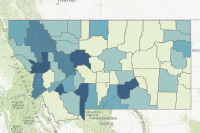

In [11]:
pop_density = gis.content.get('caab4026e8054e83bb3cb8458c5f5fe7')
pop_density

In [12]:
map1.add_layer(pop_density)

In [13]:
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [15]:
sedf = pd.DataFrame.spatial.from_featureclass(r'C:\Users\Carlos\OneDrive\Documents\ArcGIS\ESRI Training\VisualPythonAPI\FirePoints.gdb\FirePoints_Montana')

In [16]:
sedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OBJECTID       433 non-null    Int64         
 1   Fire_ID        433 non-null    string        
 2   Fire_Name      433 non-null    string        
 3   Asmnt_Type     433 non-null    string        
 4   Pre_ID         433 non-null    string        
 5   Post_ID        433 non-null    string        
 6   Fire_Type      433 non-null    string        
 7   ND_T           433 non-null    float64       
 8   IG_T           433 non-null    float64       
 9   Low_T          433 non-null    float64       
 10  Mod_T          433 non-null    float64       
 11  High_T         433 non-null    float64       
 12  Ig_Date        433 non-null    datetime64[ns]
 13  Lat            433 non-null    float64       
 14  Long           433 non-null    float64       
 15  Acres          433 non-

In [17]:
large_fires = sedf.loc[sedf.Acres > 50000, :].copy()
large_fires.head()

,OBJECTID,Fire_ID,Fire_Name,Asmnt_Type,Pre_ID,Post_ID,Fire_Type,ND_T,IG_T,Low_T,Mod_T,High_T,Ig_Date,Lat,Long,Acres,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,NA_L2KEY,NA_L1KEY,PrecipMin,PrecipMax,Month,Precip_Depart,Season,SHAPE
24,25,MT4524310605320120703,TAYLOR CREEK,Initial,503502920110818,703502920120828,Wildfire,-970.0,-150.0,160.0,322.0,540.0,2012-07-03,45.260,-106.031,64383.0,9.3,Great Plains,9,Great Plains,9.3 West-central Semiarid Prairies,9 Great Plains,4.0,6.0,7,10.62,Summer,"{""x"": -785359.6725999992, ""y"": 2516130.9260000..."
51,52,MT4566710414620020830,KRAFT SPRINGS,Initial,703402820020826,703402820020911,Wildfire,-970.0,-150.0,100.0,331.0,600.0,2002-08-30,45.667,-104.146,66292.0,9.3,Great Plains,9,Great Plains,9.3 West-central Semiarid Prairies,9 Great Plains,4.0,6.0,8,NaN,Summer,"{""x"": -634307.5344999991, ""y"": 2547084.9817999..."
62,63,MT4566910646920120625,ASH CREEK,Initial,503502820110818,703502820120828,Wildfire,-970.0,-150.0,130.0,343.0,600.0,2012-06-25,45.648,-106.137,253413.0,9.3,Great Plains,9,Great Plains,9.3 West-central Semiarid Prairies,9 Great Plains,2.0,4.0,6,12.10,Summer,"{""x"": -789035.7797999997, ""y"": 2559894.2733999..."
81,82,MT4574610716620120731,SARPY HILLS COMPLEX,Initial,503602820110910,703602820120819,Wildfire,-970.0,-150.0,120.0,275.0,480.0,2012-07-31,45.648,-107.258,83942.0,9.3,Great Plains,9,Great Plains,9.3 West-central Semiarid Prairies,9 Great Plains,2.0,4.0,7,17.75,Summer,"{""x"": -875903.1966999993, ""y"": 2569714.0955, ""..."
90,91,MT4573810684020120801,CHALKY,Initial,503602820110910,703602820120904,Wildfire,-970.0,-150.0,100.0,310.0,560.0,2012-08-01,45.754,-106.796,132680.0,9.3,Great Plains,9,Great Plains,9.3 West-central Semiarid Prairies,9 Great Plains,2.0,4.0,8,13.84,Summer,"{""x"": -838781.6534000002, ""y"": 2577241.8401999..."


In [18]:
large_fires.spatial.plot(map_widget= map1)

True

In [19]:
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [20]:
 webmap_properties = {'title':'Montana Fires', 'snippet': 'Large fires in Montana','tags':['fires', 'Montana']}

In [21]:
webmap_item = map1.save(webmap_properties)

In [22]:
webmap_item

<Item title:"Montana Fires" type:Web Map owner:costa.pimentel_DECA_UBI>